In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
emp_df = pd.read_csv("Employee.csv")

In [4]:
emp_df.head()
#all columns are categorical except age

Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0  Bachelors         2017  Bangalore            3   34    Male          No   
1  Bachelors         2013       Pune            1   28  Female          No   
2  Bachelors         2014  New Delhi            3   38  Female          No   
3    Masters         2016  Bangalore            3   27    Male          No   
4    Masters         2017       Pune            3   24    Male         Yes   

   ExperienceInCurrentDomain  LeaveOrNot  
0                          0           0  
1                          3           1  
2                          2           0  
3                          5           1  
4                          2           1

In [5]:
emp_df.describe()

JoiningYear  PaymentTier          Age  ExperienceInCurrentDomain  \
count  4653.000000  4653.000000  4653.000000                4653.000000   
mean   2015.062970     2.698259    29.393295                   2.905652   
std       1.863377     0.561435     4.826087                   1.558240   
min    2012.000000     1.000000    22.000000                   0.000000   
25%    2013.000000     3.000000    26.000000                   2.000000   
50%    2015.000000     3.000000    28.000000                   3.000000   
75%    2017.000000     3.000000    32.000000                   4.000000   
max    2018.000000     3.000000    41.000000                   7.000000   

        LeaveOrNot  
count  4653.000000  
mean      0.343864  
std       0.475047  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

In [6]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


C:\Users\dines\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


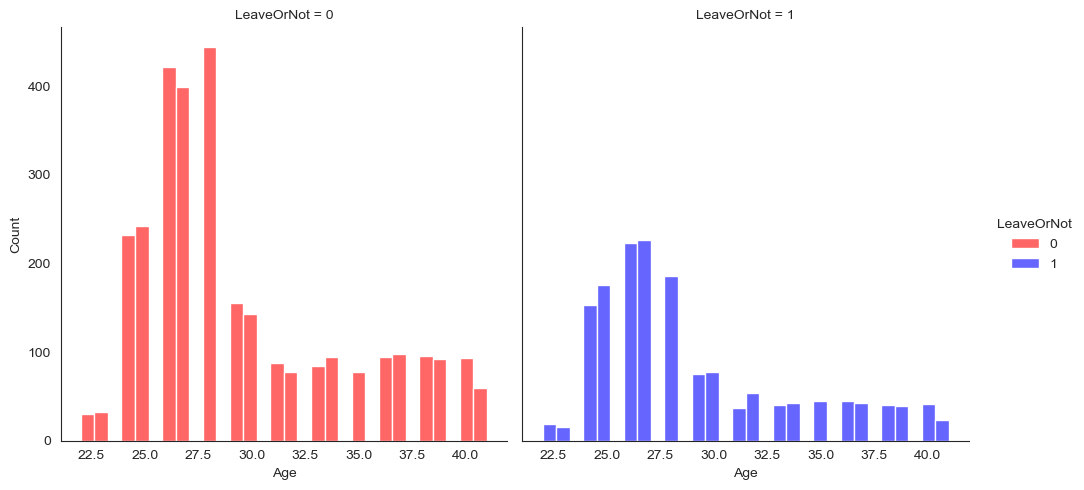

In [32]:
facet_kws = {"hue":"LeaveOrNot","palette":{0:"red",1:"blue"}}
sns.displot(x="Age",col="LeaveOrNot",**facet_kws,alpha=0.6,bins=30,data=emp_df)
sns.set_style("white")
#ages 25-28 tend to be more in notLeaving group

<Axes: xlabel='PaymentTier', ylabel='count'>

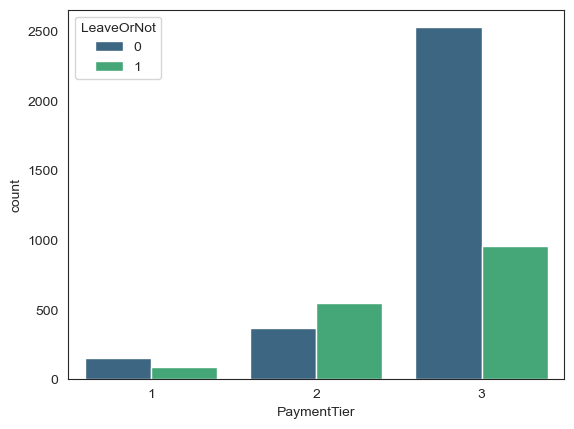

In [8]:
sns.countplot(x="PaymentTier",data=emp_df,hue="LeaveOrNot",palette="viridis")
#most people from 3rd payment tier tend to not leave

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

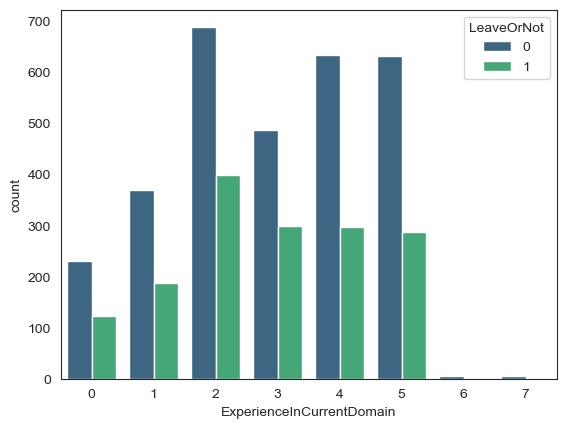

In [9]:
sns.countplot(x="ExperienceInCurrentDomain",data=emp_df,palette="viridis",hue="LeaveOrNot")
#most people in 2nd level of experience tend to leave

In [10]:
emp_df["LeaveOrNot"].value_counts()

LeaveOrNot
0    3053
1    1600
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

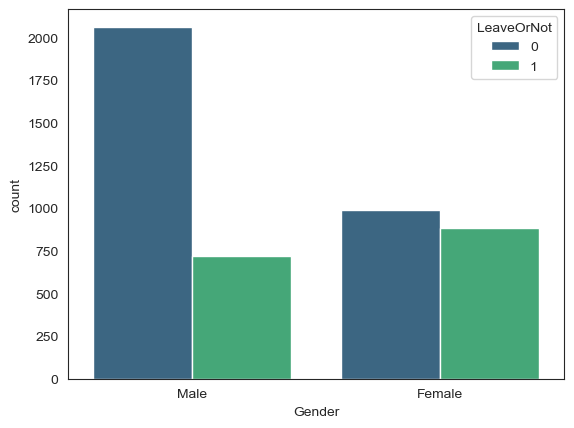

In [11]:
sns.countplot(x="Gender",data=emp_df,palette="viridis",hue="LeaveOrNot")

In [12]:
#preprocessing
emp_df.columns
cat_ft = ['Education', 'JoiningYear', 'City', 'PaymentTier','Gender',
       'EverBenched', 'ExperienceInCurrentDomain']
emp_df = pd.get_dummies(emp_df,columns=cat_ft,drop_first=True)

In [13]:
emp_df.head()

Age  LeaveOrNot  Education_Masters  Education_PHD  JoiningYear_2013  \
0   34           0              False          False             False   
1   28           1              False          False              True   
2   38           0              False          False             False   
3   27           1               True          False             False   
4   24           1               True          False             False   

   JoiningYear_2014  JoiningYear_2015  JoiningYear_2016  JoiningYear_2017  \
0             False             False             False              True   
1             False             False             False             False   
2              True             False             False             False   
3             False             False              True             False   
4             False             False             False              True   

   JoiningYear_2018  ...  PaymentTier_3  Gender_Male  EverBenched_Yes  \
0             False  ...           True         True            False   
1             False  ...          False        False            False   
2             False  ...           True        False            False   
3             False  ...           True         True            False   
4             False  ...           True         True             True   

   ExperienceInCurrentDomain_1  ExperienceInCurrentDomain_2  \
0                        False                        False   
1                        False                        False   
2                        False                         True   
3                        False                        False   
4                        False                         True   

   ExperienceInCurrentDomain_3  ExperienceInCurrentDomain_4  \
0                        False                        False   
1                         True                        False   
2                        False                        False   
3                        False                        False   
4                        False                        False   

   ExperienceInCurrentDomain_5  ExperienceInCurrentDomain_6  \
0                        False                        False   
1                        False                        False   
2                        False                        False   
3                         True                        False   
4                        False                        False   

   ExperienceInCurrentDomain_7  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  

[5 rows x 23 columns]

In [14]:
#datasplit
X = emp_df.drop("LeaveOrNot",axis=1)
y = emp_df["LeaveOrNot"]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

In [16]:
#models - knn,dtree,rfc,logreg,svm

In [17]:
#model 1 dtree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
#testing
pred_dtree = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       977
           1       0.78      0.66      0.72       559

    accuracy                           0.81      1536
   macro avg       0.80      0.78      0.79      1536
weighted avg       0.81      0.81      0.81      1536

[[875 102]
 [190 369]]


In [21]:
#tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
# Define the hyperparameter grid for RandomizedSearchCV
random_param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Define the hyperparameter grid for GridSearchCV
grid_param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(3, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['auto', 'sqrt', 'log2', None]
}
grid_dt = GridSearchCV(dtree,grid_param_grid_dt,verbose=3,cv=5)
rand_grid_dt = RandomizedSearchCV(dtree,random_param_grid_dt,n_iter=50,verbose=3,)
grid_dt.fit(X_train,y_train)
rand_grid_dt.fit(X_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_feat

[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=rando

[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=b

[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=r

[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.711 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.724 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.676 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.753 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.708 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples

[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.715 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.692 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.684 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.684 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, 

[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.666 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.691 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.721 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.716 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, sp

[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.663 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.737 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.670 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.691 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.766 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.737 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.687 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5

[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.697 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.699 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.717 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=3, 

[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=9, 

[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.709 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.665 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.745 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3

[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.695 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.720 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.697 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6

[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=3, 

[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=9, 

[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=7, sp

[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=4

[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6

[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=b

[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=r

[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=b

[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter

[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitte

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.731 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.719 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.742 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.769 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.724 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.740 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, 

[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.710 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, sp

[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.744 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.724 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.696 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, 

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.734 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.684 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.747 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.709 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.717 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, 

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.705 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.716 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, sp

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.720 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.726 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, 

[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.748 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=4, 

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.795 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.790 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.721 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.736 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.698 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=

[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.737 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.703 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=7

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=4, sp

[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=2

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=5, sp

[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=ran

[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitte

[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitt

[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter

[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=10, s

[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter

[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=rando

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, 

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.801 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=4

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.720 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.784 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.709 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, 

[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.716 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.710 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.709 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5

[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.720 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, 

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.716 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=5, sp

[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.729 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.799 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.707 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=8

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.716 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=5, 

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=2, sp

[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.742 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split

[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.760 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.745 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=8, 

[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split

[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, sp

[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_s

[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=7

[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, sp

[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=r

[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitt

[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter

[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=rando

[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitt

[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=ran

[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, sp

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.788 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.719 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.742 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.728 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split

[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.730 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, sp

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.704 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.716 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, sp

[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.753 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.742 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=5, sp

[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.761 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=9, 

[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.803 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split

[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split

[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split

[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=2

[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=8, sp

[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.857 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=5

[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=3, sp

[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split

[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=5, sp

[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitt

[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=b

[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=rando

[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=3, min_samples_split=10, splitt

[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=rando

[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitt

[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=r

[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7

[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4

[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.801 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_spl

[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.728 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.788 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split

[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, 

[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, sp

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.801 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=3, 

[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.795 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.806 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, 

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, 

[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_sampl

[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=4, sp

[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.862 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.849 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=4, 

[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.848 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.861 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=7, sp

[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitt

[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=b

[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=9, splitter

[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=rando

[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=bes

[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitt

[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.768 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, 

[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=2

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, sp

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, sp

[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, 

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.774 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5

[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split

[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.787 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=8, sp

[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_spl

[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split

[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split

[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.756 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=2

[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.822 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_spl

[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.878 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split

[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=3, 

[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=9

[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.849 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=7

[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=4, sp

[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_sampl

[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=b

[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=b

[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=rand

[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=r

[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=rando

[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=rando

[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, spl

[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, sp

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.801 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, 

[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, 

[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, sp

[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=4

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_sampl

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.777 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.840 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=5

[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=2, sp

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=8, sp

[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.790 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.790 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples

[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split

[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=4, 

[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split

[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=7, sp

[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.825 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=4, 

[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.848 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=6

[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=3

[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.870 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=9, sp

[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitte

[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5,

[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=7, s

[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=8,

[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_sampl

[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_sample

[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.785 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samp

[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples

[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_

[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_sa

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.840 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.792 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_sample

[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.806 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_

[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.790 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=4, min_sample

[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=5, min_sample

[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=1, min_samp

[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_

[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.872 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=2, min_samp

[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=3, min_samp

[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=4, min_sa

[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.828 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=10, max_features=None, min_samples_leaf=5, min_samp

[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=6, s

[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=5,

[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=3, min_samples_split=5,

[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitte

[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=4, spl

[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_sample

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samp

[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_sample

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samp

[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_sampl

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samp

[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_sample

[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=1, min_sa

[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=2, min_sample

[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=3, min_samp

[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_

[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_sa

[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=2, min_

[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=4, min_sample

[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=6, s

[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=6,

[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=5, spl

[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitte

[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=

[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.795 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_spli

[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min

[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.790 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samp

[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_spl

[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.840 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=2, min_samp

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_

[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min

[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_sampl

[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_

[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=4, min_sample

[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_

[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=2, split

[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=8, spl

[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, split

[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_spl

[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=9, spl

[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=6, spl

[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitte

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_

[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.766 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samp

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_

[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_

[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.770 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_sample

[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_

[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_spli

[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_

[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_sample

[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_sp

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samp

[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=3, min_samp

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.825 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=4, min_

[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitte

[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, s

[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=7, split

[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=4, spl

[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=7,

[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_spli

[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.862 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.790 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_sp

[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.790 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_sp

[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_sample

[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_sample

[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_sp

[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_

[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.796 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_spli

[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_sp

[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samp

[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=1, min_samp

[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_

[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_

[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=3, min_sample

[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=4, min_sample

[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_spli

[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=14, max_features=None, min_samples_leaf=5, min_samp

[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_sp

[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=3, min_samp

[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samp

[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=5, min_samples_

[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.732 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.703 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.692 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1

[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.737 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.703 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, m

[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.692 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.679 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=2, 

[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.717 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.701 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=3, 

[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.714 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.721 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.679 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.690 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.721 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.716 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.692 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=

[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.689 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.727 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.705 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=sqrt, min_samples_leaf=5, 

[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.712 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.697 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.754 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.711 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.679 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.673 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.751 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.731 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.699 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_

[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.788 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.685 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.666 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.686 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.718 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.690 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.647 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.708 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.690 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.700 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.691 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, 

[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.755 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.732 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, 

[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, 

[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=3

[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, 

[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.790 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=3, max_features=None, min_samples_leaf=5, mi

[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_

[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=2, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_sp

[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=3, min_samp

[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_sa

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.732 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, mi

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.790 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.729 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.736 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.732 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.737 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.762 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.740 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.792 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=4, mi

[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.737 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.740 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.666 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.720 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.726 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=1, 

[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.705 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.729 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.684 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.689 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.684 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.772 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.734 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=2

[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.726 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.717 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.717 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.719 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=4

[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.727 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, min_samples_leaf=5

[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=1, mi

[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=2, mi

[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samp

[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=4, mi

[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=1, min_samp

[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=2, min_samp

[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=3, min_sample

[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=4, min_sa

[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_

[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, min_samples_leaf=5, min_samp

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.738 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.803 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, mi

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.716 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.774 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2

[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.738 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, mi

[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.722 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.748 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.738 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=3, 

[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.744 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=4

[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.735 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.748 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.761 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.705 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=5, 

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.742 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.728 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.729 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.723 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.782 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.782 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.759 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, 

[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.726 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.809 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=

[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.724 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.771 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.726 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, mi

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=2, mi

[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.870 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=3, 

[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, mi

[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=4

[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_sa

[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=1, mi

[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=3, min_samples_sp

[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_sample

[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, min_samples_leaf=5, min_samples_

[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.734 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.747 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.775 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, mi

[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.772 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2

[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.728 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=best;, score=0.752 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.723 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.716 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.764 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.804 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.745 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.737 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.840 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=4, 

[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.699 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.708 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, 

[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.724 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, min_samples_

[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.722 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.793 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.724 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.709 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.771 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, mi

[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.714 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.750 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=3

[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.734 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=4

[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.726 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.790 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.746 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=1, 

[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=3, 

[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=

[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=None, min_samples_leaf=5

[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, min_sa

[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_sample

[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=2, mi

[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=4, min_samples_

[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_sample

[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.790 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.753 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, 

[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.770 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.790 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.803 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.798 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.804 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.750 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.776 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, mi

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.768 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.751 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.756 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.803 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.753 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=1, 

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.766 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.750 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.795 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.780 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=3, 

[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.790 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.796 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.748 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.745 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_le

[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.782 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.743 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.776 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.737 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5

[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.745 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf

[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.878 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.880 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, mi

[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.880 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.880 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.872 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, mi

[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=None, min_samples_leaf=5

[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=1, min_samp

[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=2, min_sa

[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samp

[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=3, min_samples_sp

[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=4, min_samp

[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, min_samples_leaf=5, min_samples_sp

[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.730 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.742 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.801 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.730 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=2, mi

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.763 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.737 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.778 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.742 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=3, mi

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.796 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=4, mi

[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.727 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.788 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, 

[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=5, 

[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=1, mi

[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.764 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, 

[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.787 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.748 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, mi

[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.774 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.780 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.846 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.856 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.877 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.885 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=1

[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.857 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.853 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=2, mi

[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.881 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.849 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.823 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf

[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.878 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf

[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.848 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.877 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.851 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.880 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=None, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=1, min_samp

[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=2, min_sample

[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samp

[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=3, min_sa

[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=4, min_sa

[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samp

[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, min_samples_leaf=5, min_samples_sp

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.822 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.769 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_sampl

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.772 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=2, mi

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.840 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.807 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.755 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, min_samples_leaf=5, 

[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, 

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.785 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.743 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_le

[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.766 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.761 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.815 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=3

[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.808 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_le

[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5

[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, min_sample

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.870 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=1, mi

[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.881 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=random;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=2, mi

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_le

[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.846 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=4, mi

[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, mi

[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.873 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=None, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_sam

[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, m

[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=3, min

[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=5, min

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.752 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_sam

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.785 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_sampl

[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.769 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.761 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.806 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.764 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=3, min_samples_split=5, splitter=random;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.819 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.750 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.754 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.798 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.801 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_sam

[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.788 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.758 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.846 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=1, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_sam

[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=0.825 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.875 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.848 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_sam

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.870 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=8, splitter=random;, score=0.856 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples

[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=None, min_sam

[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min

[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min

[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4,

[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, splitter=best;, score=0.782 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.859 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.812 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.793 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.809 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.788 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sam

[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.788 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.803 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_sam

[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.785 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, min_s

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=1, min_samples_split=8, splitter=best;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_sampl

[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_sam

[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=0.775 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.779 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.811 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min

[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=random;, score=0.762 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.806 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.788 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_lea

[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=3, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.780 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.806 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.787 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.756 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, min_sam

[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.862 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples

[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.867 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.849 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_sampl

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_sa

[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=None, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_s

[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=1

[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=2, min_sam

[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=3, m

[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=4, min_s

[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, m

[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, min_samples_leaf=5, min_s

[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_sampl

[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.839 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_sam

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.814 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples

[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.811 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.799 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_sampl

[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.824 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_lea

[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=best;, score=0.753 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, splitter=random;, score=0.840 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.837 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.807 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.811 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, m

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_lea

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.803 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=3, min_samples_split=10, splitter=random;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.793 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.822 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.796 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_le

[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.821 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_sampl

[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.825 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_sam

[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.783 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.774 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, min_sampl

[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.837 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.869 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_sample

[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_sampl

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.845 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.841 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=0.820 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.844 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.838 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_sampl

[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.849 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.867 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=None, min_samples

[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=1, m

[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=2, min_sam

[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=3, m

[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4,

[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=

[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, min_samples_leaf=5, min_sam

[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_lea

[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.812 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.796 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_le

[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.759 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_sam

[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, splitter=best;, score=0.777 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.819 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples

[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.783 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.809 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.845 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.798 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.795 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, splitter=random;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_lea

[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.782 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=9, splitter=random;, score=0.772 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.811 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.817 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.801 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, min_sampl

[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.832 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.849 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_sam

[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.814 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.821 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=4, splitter=random;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.787 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=2, splitter=random;, score=0.827 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.806 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.870 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_lea

[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.803 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.843 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.825 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=0.828 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.798 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.838 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.759 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.785 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_sam

[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=5, min_samples_split=8, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, min_samples_lea

[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.822 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_sam

[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.815 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.838 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.854 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.809 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_sampl

[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.833 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.814 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_lea

[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.844 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.791 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.848 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.853 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.839 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.846 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_sampl

[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.854 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.864 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.843 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.846 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=None, min_sampl

[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=1,

[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_sam

[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=3, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min

[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_samples_split=9, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=3, min_s

[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_samples_split=6, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=4, min_sam

[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_samples_split=8, splitter=best;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.823 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.823 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, splitter=best;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples

[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=best;, score=0.803 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.801 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.830 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.832 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.833 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.817 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, splitter=random;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.829 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sam

[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.827 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.806 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=best;, score=0.770 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.792 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=3, min_samples_split=6, splitter=random;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_l

[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.857 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.791 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.777 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, splitter=best;, score=0.816 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sampl

[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.795 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.808 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.828 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random;, score=0.787 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, splitter=best;, score=0.824 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sa

[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.796 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.782 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.793 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.801 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.767 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, min_sampl

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.819 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.780 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.800 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=1, min_samples_split=5, splitter=best;, score=0.812 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_l

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.799 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random;, score=0.785 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.804 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_l

[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.820 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=best;, score=0.793 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.822 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.833 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=2, min_samples_split=9, splitter=random;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples

[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.809 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=best;, score=0.778 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.784 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.846 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=3, min_samples_split=7, splitter=random;, score=0.831 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples

[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.841 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.791 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=best;, score=0.767 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.814 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=5, splitter=random;, score=0.829 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_l

[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.817 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.849 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.817 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.798 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=10, splitter=random;, score=0.795 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=2, splitter=best;, score=0.812 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, mi

[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.804 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=best;, score=0.790 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.827 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.800 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.777 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=0.795 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, min_sampl

[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=best;, score=0.801 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.816 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.851 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.848 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=4, splitter=random;, score=0.815 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_sam

[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=best;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.830 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.865 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.851 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.830 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=1, min_samples_split=10, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, m

[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.838 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.827 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.840 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=random;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_l

[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=4, splitter=random;, score=0.807 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.825 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.854 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.836 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.835 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=3, min_samples_split=5, splitter=best;, score=0.811 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_lea

[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.835 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.836 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.843 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.856 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=2, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples

[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.835 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.862 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.830 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.831 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=random;, score=0.804 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_sam

[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=best;, score=0.819 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.841 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.861 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.820 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.843 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=None, min_samples_leaf=5, min_samples_split=5, splitter=random;, score=0.806 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=None, min_sam

C:\Users\dines\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10800 fits failed out of a total of 43200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dines\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dines\anaconda3\Lib\site-

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=None, min_samples_leaf=5, min_samples_split=3, splitter=best;, score=0.835 total time=   0.0s
[CV 2/5] END criteri

[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.739 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.707 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.746 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.740 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best;, score=0.751 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, min_samples_leaf=4, min_samples_split=4, spli

[CV 3/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.852 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.841 total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=3, min_samples_split=10, splitter=best;, score=0.812 total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.788 total time=   0.0s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.792 total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=7, splitter=random;, score=0.814 total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, min_samples_

[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, min_samples_leaf=5, min_samples_split=7, splitter=random;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.819 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.779 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=best;, score=0.822 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=log2, min_samples_leaf=4, min_samples_split=7, s

C:\Users\dines\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dines\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\dines\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\dines\anaconda3\Lib\site-packages

RandomizedSearchCV(estimator=DecisionTreeClassifier(), n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'splitter': ['best', 'random']},
                   verbose=3)

In [24]:
pred_rand_grid_dt = rand_grid_dt.predict(X_test)
pred_grid_dt = grid_dt.predict(X_test)
from sklearn.metrics import classification_report
print("random grid")
print(classification_report(y_test,pred_rand_grid_dt))
print("grid search")
print(classification_report(y_test,pred_grid_dt))

random grid
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       977
           1       0.86      0.66      0.74       559

    accuracy                           0.84      1536
   macro avg       0.84      0.80      0.81      1536
weighted avg       0.84      0.84      0.83      1536

grid search
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       977
           1       0.89      0.69      0.77       559

    accuracy                           0.85      1536
   macro avg       0.86      0.82      0.83      1536
weighted avg       0.86      0.85      0.85      1536



In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [26]:
#metrics
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       977
           1       0.84      0.69      0.76       559

    accuracy                           0.84      1536
   macro avg       0.84      0.81      0.82      1536
weighted avg       0.84      0.84      0.83      1536



In [30]:

param_grid_rnd_rfc ={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid_rnd_rfc, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
rfc_random.fit(X_train,y_train)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [31]:
pred_grid_rfc = grid_search.predict(X_test)
pred_rand_grid_rfc = rfc_random.predict(X_test)
print(classification_report(y_test,pred_grid_rfc))
print(classification_report(y_test,pred_rand_grid_rfc))


              precision    recall  f1-score   support

           0       0.83      0.97      0.89       977
           1       0.92      0.65      0.76       559

    accuracy                           0.85      1536
   macro avg       0.87      0.81      0.82      1536
weighted avg       0.86      0.85      0.84      1536

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       977
           1       0.90      0.68      0.77       559

    accuracy                           0.86      1536
   macro avg       0.87      0.82      0.83      1536
weighted avg       0.86      0.86      0.85      1536



In [33]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)


SVC()

In [35]:
pred_svm = svm.predict(X_test)
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       977
           1       1.00      0.01      0.01       559

    accuracy                           0.64      1536
   macro avg       0.82      0.50      0.39      1536
weighted avg       0.77      0.64      0.50      1536



In [36]:
#tuning
param_grid_Svm = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid_svm = GridSearchCV(SVC(),param_grid_Svm,refit=True,verbose=3)
grid_svm.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.670 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.678 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.666 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.753 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.764 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.665 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.803 total time=   0.6s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.791 total time=   0.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.803 total time=   0.6s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.751 total time=   0.6s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.788 total time=   1.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.798 total time=   0.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.793 total time=   1.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.775 total time=   0.7s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.861 total time=   2.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.877 total time=   1.8s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.854 total time=   1.7s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
pred_grid_svm = grid_svm.predict(X_test)
print(classification_report(y_test,pred_grid_svm))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       977
           1       0.85      0.69      0.76       559

    accuracy                           0.84      1536
   macro avg       0.84      0.81      0.82      1536
weighted avg       0.84      0.84      0.84      1536



In [42]:
from sklearn.preprocessing import StandardScaler
st_sclr = StandardScaler()
st_sclr.fit(X_train)
X_train_lg = st_sclr.transform(X_train)
st_sclr.fit(X_test)
X_test_lg = st_sclr.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression();
lg.fit(X_train_lg,y_train)
pred_lg = lg.predict(X_test_lg)
print(classification_report(y_test,pred_lg))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       977
           1       0.84      0.55      0.66       559

    accuracy                           0.80      1536
   macro avg       0.81      0.74      0.76      1536
weighted avg       0.80      0.80      0.78      1536



In [48]:
# Create a parameter grid for RandomizedSearchCV
random_param_grid_lg = {
    'penalty': ['l2', 'none'], 
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': np.arange(100, 1000, 100),
    'random_state': [42]
}

grid_param_grid_lg = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500],
    'random_state': [42]
}


# Create a RandomizedSearchCV instance
random_search_lg = RandomizedSearchCV(lg, random_param_grid_lg, n_iter=100, cv=5, random_state=42, n_jobs=-1)

# Create a GridSearchCV instance
grid_search_lg = GridSearchCV(lg, grid_param_grid_lg, cv=5, n_jobs=-1)
random_search_lg.fit(X_train_lg,y_train)
grid_search_lg.fit(X_train_lg,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 200, 300, 400, 500],
                         'random_state': [42],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']})

In [49]:
pred_random_search_lg = random_search_lg.predict(X_test_lg)
pred_grid_search_lg = grid_search_lg.predict(X_test_lg)
print("randomized search cv")
print(classification_report(y_test,pred_random_search_lg))
print("grid sarch cv")
print(classification_report(y_test,pred_grid_search_lg))

randomized search cv
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       977
           1       0.84      0.55      0.66       559

    accuracy                           0.80      1536
   macro avg       0.81      0.74      0.76      1536
weighted avg       0.80      0.80      0.78      1536

grid sarch cv
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       977
           1       0.84      0.55      0.66       559

    accuracy                           0.80      1536
   macro avg       0.81      0.74      0.76      1536
weighted avg       0.80      0.80      0.78      1536



In [ ]:
#best performance
#RFC + Random_Search